In [1]:

%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets
data = datasets.load_boston()

print data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
print data.feature_names
print data.data[0]
print data.target[0]

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]
24.0


In [4]:

import numpy as np
import pandas as pd

In [6]:
# first we want to put our features database into a data frame

df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# second  we want to put our target database into a data frame

targets = pd.DataFrame(data.target, columns=["MEDV"])

# Take a look at the first few rows
print df.head()
print targets.head()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [13]:
df['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [12]:
targets.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [21]:

# Now let's fit a linear model to the data. First let's take a look at some of the variables we identified visually as being linked to house value, RM and LSTAT. Let's look at each individually and then both together.
# Note that statsmodels does not add a constant term by default, so you need to use X = sm.add_constant(X) if you want a constant term.


import statsmodels.api as sm

In [22]:
# Now let's fit a linear model to the data. First let's take a look at some of the variables we identified visually as being linked to house value, RM and LSTAT. Let's look at each individually and then both together.
# Note that statsmodels does not add a constant term by default, so you need to use X = sm.add_constant(X) if you want a constant term.

X = df["RM"]
y = targets["MEDV"]



In [23]:
# Note the difference in argument order
#creating a new object called 'model" and we want take x and y and fit them together
# this is taking two tables, fitting them together, and then running a linear regression model. 
model = sm.OLS(y, X).fit()



In [24]:
predictions = model.predict(X)

In [25]:
predictions

array([ 24.02077888,  23.45816292,  26.24932262,  25.5661461 ,
        26.11049531,  23.49104307,  21.9639426 ,  22.54847867,
        20.5720161 ,  21.9347158 ,  23.2974155 ,  21.95298255,
        21.51458051,  21.73378153,  22.27082404,  21.31364623,
        21.68263462,  21.8835689 ,  19.93267978,  20.92273774,
        20.34916173,  21.79223514,  22.43887816,  21.23692588,
        21.64244777,  20.45510889,  21.23692588,  22.09180987,
        23.72851085,  24.38246057,  20.87159084,  22.18314363,
        21.73743488,  20.82775063,  22.27082404,  21.67532792,
        21.33921969,  21.37209984,  21.79588849,  24.09384589,
        25.66113321,  24.73318221,  22.53751862,  22.69095933,
        22.17218358,  20.75833697,  21.13828541,  22.02970291,
        19.72443881,  20.46606894,  21.78492844,  22.3402377 ,
        23.78696445,  21.9127957 ,  21.51092716,  26.48313705,
        23.3193356 ,  24.90123633,  22.44983821,  21.65340782,
        20.97388465,  21.79588849,  23.58603018,  24.70

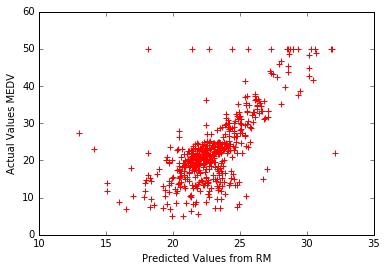

MSE: 270070.558471


In [26]:
# Interpreting the Coefficients
# Here the coefficient of 3.634 means that as the RM variable increases by 1, the predicted value of MDEV increases by 3.634.
# Let's plot the predictions versus the actual values.
# In [ ]:
# Plot the model

plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model

In [29]:
# Check: How does this plot relate to the model? In other words, how are the independent variable (RM) and dependent variable ("MEDV") incorporated?
# Solution: They are used to make the predicted values (the x-axis)
# Let's try it with a constant term now.
# ## With a constant
# X = sm.add_constant(X)


import statsmodels.api as sm

X = df["RM"]
# add a constant to x variable and give us two columns
X = sm.add_constant(X)


In [30]:
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           2.49e-74
Time:                        15:13:53   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000       -39.877   -29.465
RM             9.1021      0.419     21.722      0.000         8.279     9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

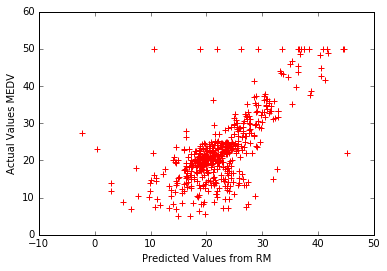

MSE: 20654.4162188


In [31]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model

In [32]:
# Interpreting the Coefficients
# With the constant term the coefficients are different. Without a constant we are forcing our model to go through the origin, but now we have a y-intercept at -34.67. We also changed the slope of the RM regressor from 3.634 to 9.1021.
# Next let's try a different predictor, LSTAT.

X = df[["LSTAT"]]
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     410.9
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           2.71e-67
Time:                        15:21:48   Log-Likelihood:                -2182.4
No. Observations:                 506   AIC:                             4367.
Df Residuals:                     505   BIC:                             4371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
LSTAT          1.1221      0.055     20.271      0.000         1.013     1.231
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.051
Skew:                           0.112   Prob(JB):                        0.591
Kurtosis:                       3.009   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

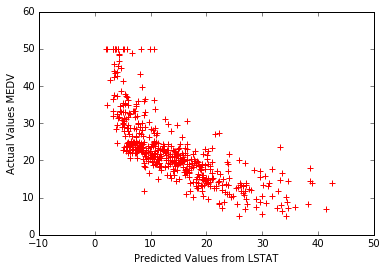

MSE: 134427.133958


In [34]:
#This model is not very predictive

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model


In [44]:
# Finally, let's fit a model using both RM and LSTAT.

X = df[["RM", "LSTAT"]]     
y = targets["MEDV"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     4637.
Date:                Tue, 11 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:35:21   Log-Likelihood:                -1582.9
No. Observations:                 506   AIC:                             3170.
Df Residuals:                     504   BIC:                             3178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000         4.769     5.045
LSTAT         -0.6557      0.031    -21.458      0.000        -0.716    -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

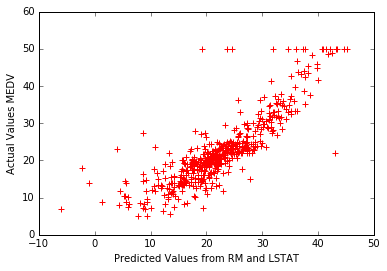

MSE: 22107.3171273


In [43]:
# now it is looking better
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM and LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model

In [38]:
# Finally, let's fit a model using both RM and LSTAT.

X = df[["RM", "LSTAT", '']]
y = targets["MEDV"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     4637.
Date:                Tue, 11 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:29:15   Log-Likelihood:                -1582.9
No. Observations:                 506   AIC:                             3170.
Df Residuals:                     504   BIC:                             3178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000         4.769     5.045
LSTAT         -0.6557      0.031    -21.458      0.000        -0.716    -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

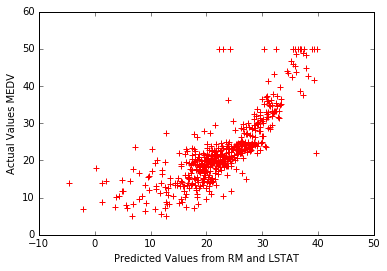

MSE: 142090.70278


In [39]:
# now it is looking better
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM and LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model

In [45]:

# Finally, let's fit a model using all the series points

X = df[["RM", "LSTAT",'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT']]     
y = targets["MEDV"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.1
Date:                Tue, 11 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:35:28   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RM             2.9626      0.155     19.168      0.000         2.659     3.266
LSTAT         -0.2085      0.025     -8.214      0.000        -0.258    -0.159
CRIM          -0.0916      0.034     -2.675      0.008        -0.159    -0.024
ZN             0.0487      0.014      3.379      0.001         0.020     0.077
INDUS         -0.0038      0.064     -0.059      0.953        -0.130     0.123
CHAS           2.8564      0.904      3.160      0.002         1.080     4.633
NOX           -2.8808      3.359     -0.858      0.392        -9.481     3.720
RM             2.9626      0.155     19.168      0.000         2.659     3.266
AGE           -0.0072      0.014     -0.523      0.601        -0.034     0.020
DIS           -0.9680      0.196     -4.947      0.000        -1.352    -0.584
RAD            0.1704      0.067      2.554      0.011         0.039     0.302
TAX           -0.0094      0.004     -2.393      0.017        -0.017    -0.002
PTRATIO       -0.3924      0.110     -3.571      0.000        -0.608    -0.177
B              0.0150      0.003      5.561      0.000         0.010     0.020
LSTAT         -0.2085      0.025     -8.214      0.000        -0.258    -0.159
==============================================================================
Omnibus:                      204.050   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.527
Skew:                           1.609   Prob(JB):                    9.11e-299
Kurtosis:                      10.399   Cond. No.                     5.00e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.34e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

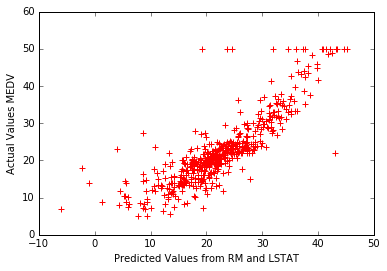

MSE: 22107.3171273


In [50]:
# now it is looking better
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM and LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model

In [51]:
# the bigger the MSE when comparing 2 datasets and one has a larger MSE, the suggestion is that this is LESS predictive. 
# and you should drop some variables....


In [52]:
# Preparing data with Patsy¶
# Patsy is a python package that makes preparing data a bit easier. It uses a special formula syntax to create the X and y matrices we use to fit our models with.
# Let's look at a few examples. To get the X and y matrices for the previous example, try the following.

import patsy

# First let's add the targets to our data frame
df["MEDV"] = targets["MEDV"]



In [53]:
# My Y is going to be before the ~ my x data is going to be to the right. 

y, X = patsy.dmatrices("MEDV ~ RM + LSTAT", data=df)
print X[0:5, :]


[[ 1.     6.575  4.98 ]
 [ 1.     6.421  9.14 ]
 [ 1.     7.185  4.03 ]
 [ 1.     6.998  2.94 ]
 [ 1.     7.147  5.33 ]]


In [54]:
print y[0:5, :]

[[ 24. ]
 [ 21.6]
 [ 34.7]
 [ 33.4]
 [ 36.2]]


In [57]:
# Exercises
# Practice using patsy formulas and fit models for
# CRIM and INDUS versus MDEV (price)


y, X = patsy.dmatrices("MEDV ~ CRIM + INDUS", data=df)
print X[0:5, :]
print y[0:5, :]

[[  1.00000000e+00   6.32000000e-03   2.31000000e+00]
 [  1.00000000e+00   2.73100000e-02   7.07000000e+00]
 [  1.00000000e+00   2.72900000e-02   7.07000000e+00]
 [  1.00000000e+00   3.23700000e-02   2.18000000e+00]
 [  1.00000000e+00   6.90500000e-02   2.18000000e+00]]
[[ 24. ]
 [ 21.6]
 [ 34.7]
 [ 33.4]
 [ 36.2]]


In [60]:
crim_indus_model = sm.OLS(y,X).fit()

In [61]:
predictions_cim =crim_indus_model.predict(X)

In [67]:
crim_indus_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     96.47
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           3.45e-36
Time:                        16:15:39   Log-Likelihood:                -1758.1
No. Observations:                 506   AIC:                             3522.
Df Residuals:                     503   BIC:                             3535.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     29.2560      0.671     43.618      0.000        27.938    30.574
CRIM          -0.2433      0.044     -5.486      0.000        -0.330    -0.156
INDUS         -0.5252      0.056     -9.452      0.000        -0.634    -0.416
==============================================================================
Omnibus:                      193.507   Durbin-Watson:                   0.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.456
Skew:                           1.798   Prob(JB):                    2.09e-142
Kurtosis:                       7.244   Cond. No.                         27.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

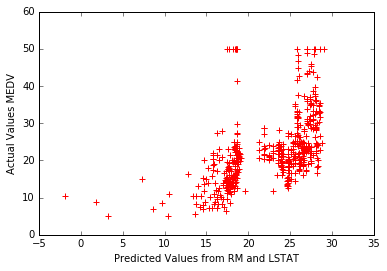

MSE: 5921.17051979


In [65]:
# now it is looking better
# Plot the model
plt.scatter(predictions_cim, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM and LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", crim_indus_model.mse_model

In [69]:
y, X = patsy.dmatrices("MEDV ~ AGE + CHAS", data=df)
print X[0:5, :]
print y[0:5, :]

[[  1.   65.2   0. ]
 [  1.   78.9   0. ]
 [  1.   61.1   0. ]
 [  1.   45.8   0. ]
 [  1.   54.2   0. ]]
[[ 24. ]
 [ 21.6]
 [ 34.7]
 [ 33.4]
 [ 36.2]]


In [70]:
age_chas_model = sm.OLS(y,X).fit()

In [71]:
predictions_acm =age_chas_model.predict(X)

In [72]:
age_chas_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     57.33
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           3.73e-23
Time:                        16:19:03   Log-Likelihood:                -1788.3
No. Observations:                 506   AIC:                             3583.
Df Residuals:                     503   BIC:                             3595.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     30.8601      0.975     31.662      0.000        28.945    32.775
AGE           -0.1291      0.013     -9.782      0.000        -0.155    -0.103
CHAS           7.5838      1.462      5.186      0.000         4.711    10.457
==============================================================================
Omnibus:                      161.230   Durbin-Watson:                   0.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.990
Skew:                           1.612   Prob(JB):                     4.20e-89
Kurtosis:                       5.984   Cond. No.                         293.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

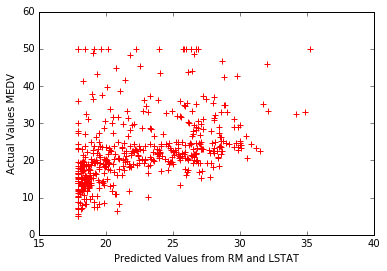

MSE: 3964.75577486


In [74]:
# now it is looking better
# Plot the model
plt.scatter(predictions_acm, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM and LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", age_chas_model.mse_model

In [132]:
y, X = patsy.dmatrices("MEDV ~ B + INDUS + NOX + RAD", data=df)
print X[0:5, :]
print y[0:5, :]

[[   1.     396.9      2.31     0.538    1.   ]
 [   1.     396.9      7.07     0.469    2.   ]
 [   1.     392.83     7.07     0.469    2.   ]
 [   1.     394.63     2.18     0.458    3.   ]
 [   1.     396.9      2.18     0.458    3.   ]]
[[ 24. ]
 [ 21.6]
 [ 34.7]
 [ 33.4]
 [ 36.2]]


In [133]:
rcnd_model = sm.OLS(y,X).fit()

In [134]:
predictions_rcnd =rcnd_model.predict(X)

In [135]:
rcnd_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     46.33
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           3.97e-33
Time:                        16:36:20   Log-Likelihood:                -1760.6
No. Observations:                 506   AIC:                             3531.
Df Residuals:                     501   BIC:                             3552.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     25.7261      2.902      8.864      0.000        20.024    31.428
B              0.0158      0.004      3.624      0.000         0.007     0.024
INDUS         -0.4431      0.082     -5.407      0.000        -0.604    -0.282
NOX           -5.6905      4.945     -1.151      0.250       -15.406     4.025
RAD           -0.0756      0.055     -1.382      0.168        -0.183     0.032
==============================================================================
Omnibus:                      185.216   Durbin-Watson:                   0.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              599.475
Skew:                           1.731   Prob(JB):                    6.70e-131
Kurtosis:                       7.056   Cond. No.                     5.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

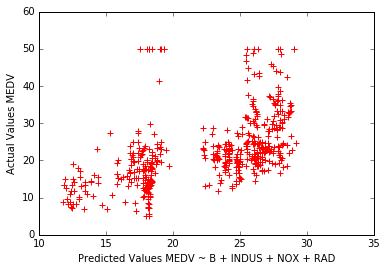

MSE: 2883.34258219


In [136]:
# now it is looking better
# Plot the model
plt.scatter(predictions_rcnd, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values MEDV ~ B + INDUS + NOX + RAD")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", rcnd_model.mse_model